In [ ]:
!pip install gensim

In [19]:
# 1. Setup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# 2. Load Data
reviews = pd.read_csv("Review Data.csv")
reviews = reviews[['Body', 'Rating']].dropna()
reviews = reviews.rename(columns={'Body': 'reviewText', 'Rating': 'overall'})

In [14]:
# 3. Sentiment Analysis
reviews['sentiment'] = reviews['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [15]:
reviews_sorted = reviews.sort_values(by='sentiment', ascending=True)
reviews_sorted[['reviewText', 'sentiment','overall']]

,reviewText,sentiment,overall
207,I received a used one that's all scratched up....,-1.000,1
368,"Sounds awful, kids don’t like it!",-1.000,1
377,It was a crap product and broke within 8 hours,-0.800,1
320,Worthless,-0.800,1
352,Disappointed in this product. Bought as a gift...,-0.750,1
...,...,...,...
559,Great party piece‼️🎼🎶🎵,0.800,4
546,I bought for a costume and it was good for that!,0.875,4
611,loved this!,0.875,5
646,Appearance. Perfect gift for a kid.,1.000,5


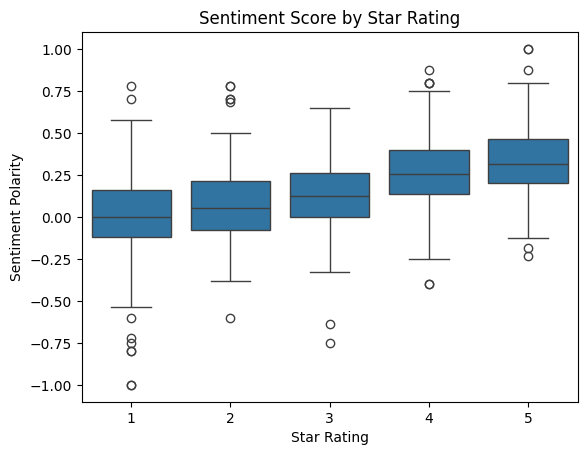

In [16]:
# 4. Visualization
sns.boxplot(data=reviews, x='overall', y='sentiment')
plt.title('Sentiment Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

/tmp/ipython-input-1032568786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall', palette='viridis')


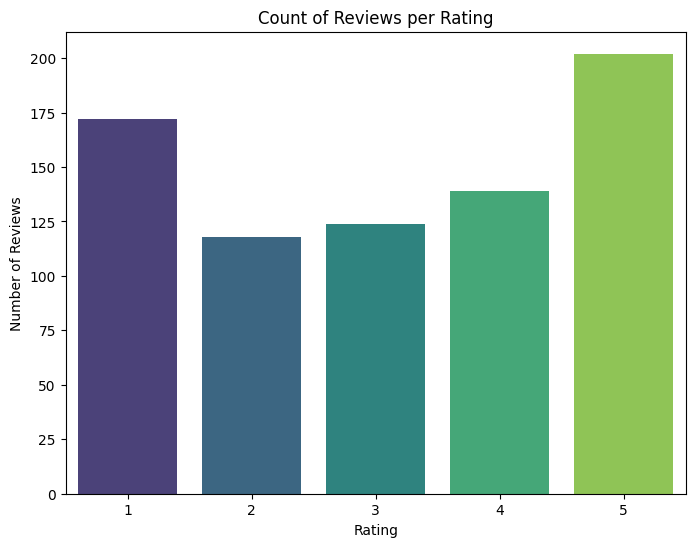

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='overall', palette='viridis')
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [20]:
# 5. Topic Modeling
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews['tokens'] = reviews['reviewText'].apply(preprocess)

In [11]:
reviews

,reviewText,overall,sentiment
0,"I was not completely sure about this one, so r...",5,0.270833
1,This is a great little ukelele/toy guitar - gr...,5,0.213733
2,"The product is something that, although cheap ...",5,0.437500
3,"It is a child's toy, I don't believe it's mean...",5,0.172778
4,The fact that it's plastic is huge. My kid dro...,4,0.054762
...,...,...,...
750,"I love that is a low-priced, while still high-...",5,0.193333
751,My daughter wanted a guitar. I think she wante...,5,0.400000
752,I bought this for my grandson. He LOVES it. No...,5,0.334848
753,I ordered this for for my little cousin he is ...,5,-0.059375


In [21]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.016*"strings" + 0.015*"play" + 0.014*"ukulele" + 0.013*"little" + 0.013*"one" + 0.012*"toy" + 0.012*"plastic" + 0.011*"guitar" + 0.010*"get" + 0.010*"old"'),
 (1,
  '0.019*"strings" + 0.013*"would" + 0.012*"toy" + 0.011*"one" + 0.011*"quality" + 0.010*"like" + 0.010*"guitar" + 0.009*"cheap" + 0.009*"good" + 0.009*"plastic"'),
 (2,
  '0.021*"old" + 0.019*"great" + 0.018*"guitar" + 0.017*"year" + 0.013*"loves" + 0.013*"strings" + 0.013*"little" + 0.010*"toy" + 0.010*"good" + 0.010*"play"')]

In [22]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.016*"one" + 0.014*"strings" + 0.012*"would" + 0.012*"like" + 0.011*"old" + 0.011*"broke" + 0.010*"year" + 0.009*"get" + 0.009*"guitar" + 0.009*"got"'),
 (1,
  '0.017*"strings" + 0.017*"great" + 0.016*"toy" + 0.016*"guitar" + 0.014*"little" + 0.013*"old" + 0.012*"play" + 0.010*"plastic" + 0.010*"ukulele" + 0.010*"small"')]

# Filter for <=3 ratings

In [23]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)

/tmp/ipython-input-2551902449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


In [24]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.030*"strings" + 0.012*"get" + 0.011*"toy" + 0.010*"would" + 0.010*"made" + 0.010*"play" + 0.009*"instrument" + 0.009*"tune" + 0.009*"even" + 0.009*"string"'),
 (1,
  '0.019*"strings" + 0.017*"plastic" + 0.017*"like" + 0.014*"toy" + 0.013*"old" + 0.011*"guitar" + 0.011*"get" + 0.010*"year" + 0.010*"would" + 0.010*"cheap"'),
 (2,
  '0.020*"broke" + 0.017*"one" + 0.014*"bought" + 0.012*"would" + 0.012*"small" + 0.011*"smaller" + 0.011*"strings" + 0.011*"gift" + 0.009*"guitar" + 0.009*"cheap"')]

# Adding common phrases

In [25]:
from gensim.models import Phrases
bigram = Phrases(reviews['tokens'], min_count=3, threshold=5)
bigram_mod = Phrases(bigram[reviews['tokens']])
reviews['tokens'] = [bigram[doc] for doc in reviews['tokens']]

In [26]:
reviews

,reviewText,overall,sentiment,tokens
0,"I was not completely sure about this one, so r...",5,0.270833,"[completely, sure, one, reached, seller, askin..."
1,This is a great little ukelele/toy guitar - gr...,5,0.213733,"[great, little, guitar, great, gifting, childr..."
2,"The product is something that, although cheap ...",5,0.437500,"[product, something, although, cheap_plastic, ..."
3,"It is a child's toy, I don't believe it's mean...",5,0.172778,"[child, toy, believe, meant, used, adult, ukul..."
4,The fact that it's plastic is huge. My kid dro...,4,0.054762,"[fact, plastic, huge, kid, drops, hits, things..."
...,...,...,...,...
750,"I love that is a low-priced, while still high-...",5,0.193333,"[love, still, item, attached_pick, safe, fun, ..."
751,My daughter wanted a guitar. I think she wante...,5,0.400000,"[daughter, wanted, guitar, think, wanted, full..."
752,I bought this for my grandson. He LOVES it. No...,5,0.334848,"[bought, grandson_loves, almost, years_old, fi..."
753,I ordered this for for my little cousin he is ...,5,-0.059375,"[ordered, little, cousin, music, thought, bit,..."


In [27]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.016*"small" + 0.014*"strings" + 0.014*"toy" + 0.012*"guitar" + 0.010*"one" + 0.010*"ukulele" + 0.009*"bought" + 0.009*"great" + 0.008*"play" + 0.008*"year_old"'),
 (1,
  '0.015*"guitar" + 0.014*"strings" + 0.013*"one" + 0.013*"good" + 0.011*"play" + 0.009*"plastic" + 0.008*"got" + 0.008*"bought" + 0.007*"get" + 0.007*"like"'),
 (2,
  '0.019*"great" + 0.018*"toy" + 0.011*"ukulele" + 0.010*"strings" + 0.010*"little" + 0.010*"guitar" + 0.009*"year_old" + 0.009*"kids" + 0.008*"quality" + 0.008*"price"')]

In [28]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-1734944771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


[(0,
  '0.018*"strings" + 0.017*"made" + 0.015*"small" + 0.014*"toy" + 0.013*"old" + 0.012*"smaller" + 0.012*"even" + 0.011*"tiny" + 0.011*"year" + 0.010*"cheaply"'),
 (1,
  '0.018*"one" + 0.016*"broke" + 0.015*"strings" + 0.015*"guitar" + 0.013*"would" + 0.013*"like" + 0.012*"cheap" + 0.009*"first" + 0.008*"plastic" + 0.008*"thing"'),
 (2,
  '0.026*"strings" + 0.016*"plastic" + 0.015*"toy" + 0.014*"get" + 0.013*"play" + 0.010*"small" + 0.009*"like" + 0.009*"old" + 0.009*"would" + 0.009*"guitar"')]

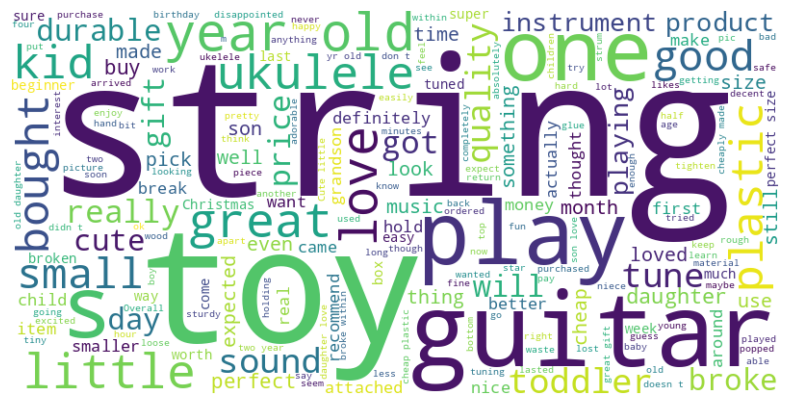

In [29]:
from wordcloud import WordCloud

text = " ".join(reviews['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Trying facebook model

In [34]:
!pip install transformers

Here we train AI to categorize reviews

In [30]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

ImportError: cannot import name 'pipeline' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [35]:
candidate_labels = [
    "stings easily break",
    "poor build quailty",
    "poor sound quailty",
    "Smaller than expected",
    "Cheaper than expected",
    "Fun for kids",
    "Great beginner instrument",
    "good sound quailty",
    "Safe for children",
]


Here are examples of trained AI

In [36]:
review = "I play guitar and my daughter keeps trying to play with it so for Christmas I thought of getting her something so she can play with me. It difficult to hold a tune but it looks really good. My kid loved it out of the box and she actually sleeps with it every day. Great product."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])

NameError: name 'classifier' is not defined

In [37]:
review = "Package arrived neatly packed and quick! Always wanted to buy a mini guitar with actual strings (not buttons) for my toddler and decided to buy this one because I read in someone's review that the strings are made of plastic which imo is safer than metal. This will make for a good gift and I'm considering buying one for my nephew as well. I'm happy with my purchase."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])

NameError: name 'classifier' is not defined

In [ ]:
review = "I was not completely sure about this one, so reached out to the seller asking if this is suitable for 3,5 y.o. They said it should be completely fine. So it’s not too loud and not a disturbing sound, so she can play whatever she likes. And not too flimsy - has not broken it yet :)."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])


In [ ]:
reviews

In [12]:
%pip install pandas==1.5.3 nltk==3.8.1 textblob==0.17.1 gensim==4.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 23.8 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=82d047e376ef33b7195ac92add5e33ad424735eb54a21507501abce62ba747ba
  Stored in directory: /root/.cache/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful